In [13]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
credit_card= pd.read_csv('C:\DS&AI\Vimala\Python\step Presentation\creditcard.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
credit_card.drop_duplicates(inplace=True)
credit_card['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [16]:
#df = df.sample(frac=1)

fraud_df = credit_card.loc[credit_card['Class']==1]
non_fraud_df=  credit_card.loc[credit_card['Class']==0][:473]
distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = distributed_df.sample(frac=1, random_state=42)


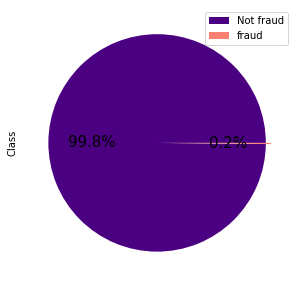

In [17]:
plt.figure(figsize=(7,5))

credit_card['Class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], \
explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Not fraud', 'fraud'])
plt.show()

In [18]:
abs(credit_card.corr()['Class'][:]).sort_values(ascending=False)

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64

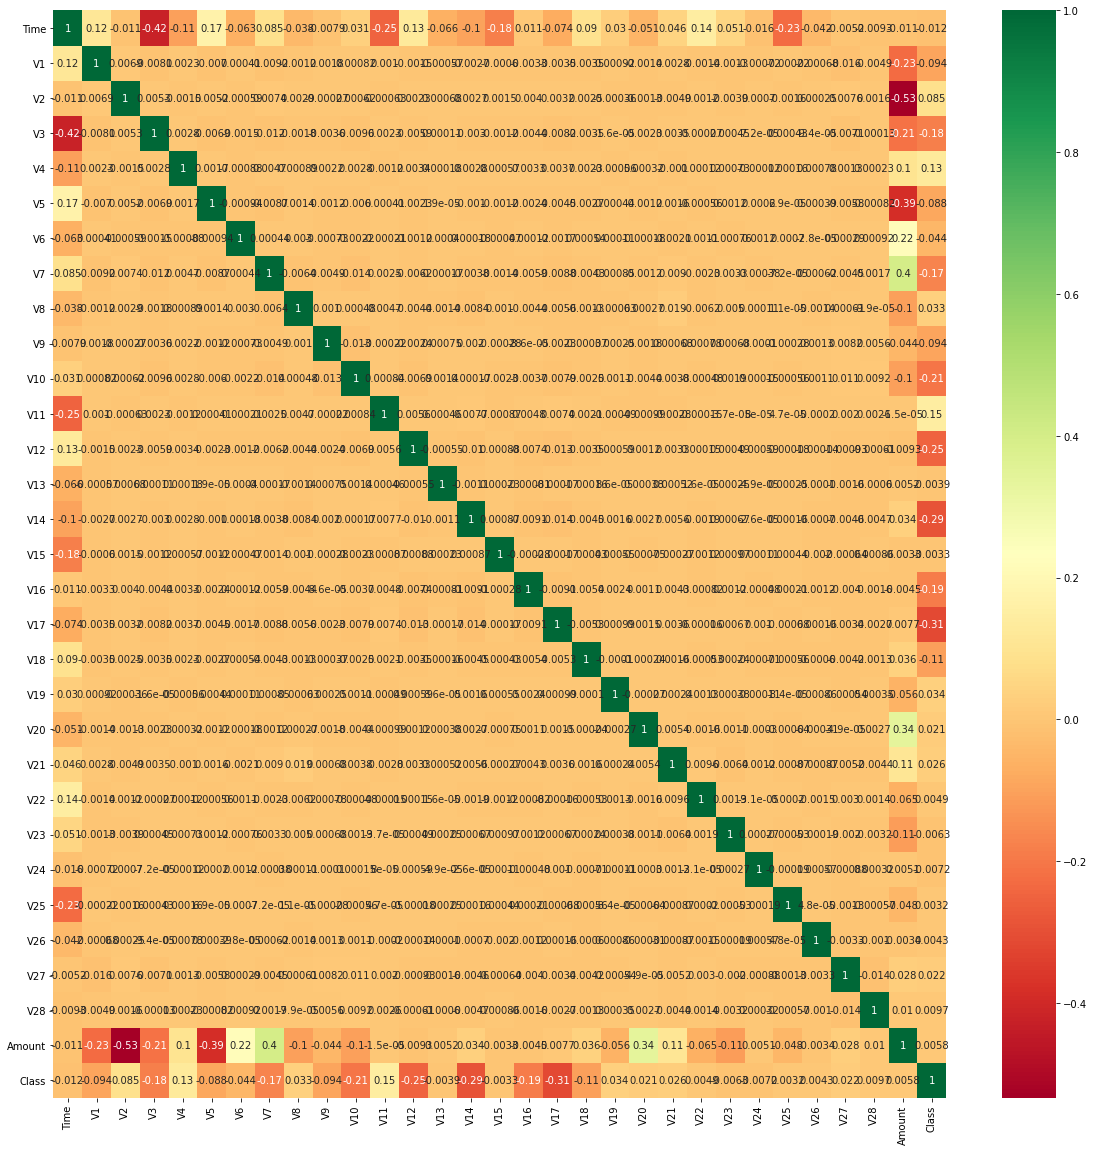

In [19]:
plt.subplots(figsize=(20,20))
sns.heatmap(credit_card.corr(),cmap= 'RdYlGn',annot=True)
plt.show()

<AxesSubplot:title={'center':'Distribution of time for fraudulent samples'}, xlabel='Time', ylabel='Count'>

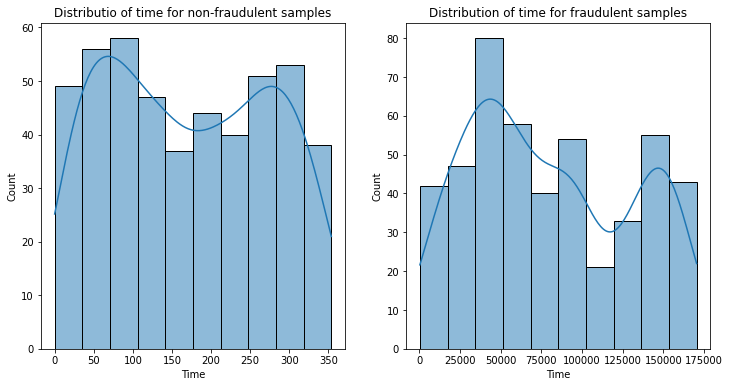

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Distributio of time for non-fraudulent samples')
sns.histplot(non_fraud_df["Time"],kde=True)
plt.subplot(1, 2, 2)
plt.title('Distribution of time for fraudulent samples')
sns.histplot(fraud_df["Time"],kde=True)

Although the time of fraudulent and non-fraudulent transactions is very similar, there are still minor variances.As a result, Time can supply some useful data.

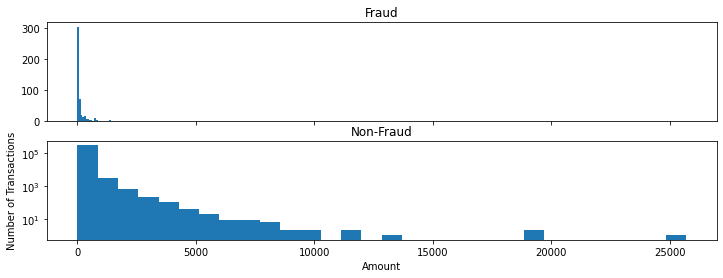

In [21]:
# now checking Amount in case of Fraud and Non-Fraud

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(credit_card.Amount[credit_card.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(credit_card.Amount[credit_card.Class == 0], bins = bins)
axis_2.set_title('Non-Fraud')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()


We can see that fraud transactions are small, but this cannot be utilised as a primary criterion because non-fraud transactions also include a large number of small transactions. So, in a way, we may conclude that if the amount isn't large, it's 'probably' not a fraud transaction, but obviously, fraud and non-fraud transactions can't be discriminated just on the basis of the amount.

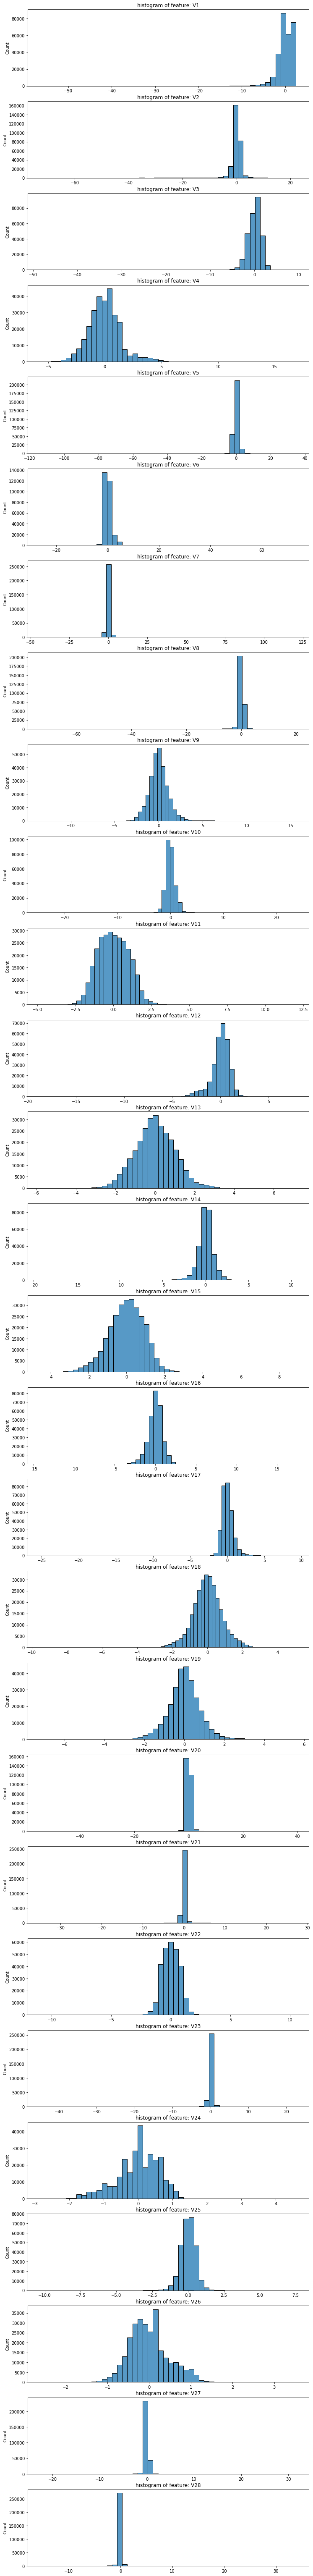

In [12]:
# getting all the V features
v_features = credit_card.iloc[:,1:29].columns

#plotting histograms of all v_features (of fraud +normal) to check which of them are useful
# the more diff b/w fraud and normal = more important for learning
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(credit_card[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(credit_card[cn][credit_card.Class == 1], bins=50,label="Fraud")
    sns.histplot(credit_card[cn][credit_card.Class == 0], bins=50,label="Non Fraud")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+cn)
plt.show()


Because most distributions have a one-sided tail and appear Gaussian, outlier detection and removal is required.